<a href="https://colab.research.google.com/github/vasanth6382/Machine_learning/blob/main/Ethanol_Demand_Forescasting_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# LOAD THE DATASET

In [4]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Unzip the uploaded file
zip_path = '/content/archive.zip'
extract_path = '/content/ethanol_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
extracted_files = os.listdir(extract_path)

# Initialize an empty list to hold the data
data_frames = []

# Read each Excel file and append to the list
for file in extracted_files:
    if file.endswith('.xlsx'):
        file_path = os.path.join(extract_path, file)
        df = pd.read_excel(file_path)
        data_frames.append(df)

In [5]:
# Concatenate all data frames
consolidated_data = pd.concat(data_frames, ignore_index=True)


In [6]:
# Display the first few rows of the consolidated data
print(consolidated_data.head())

              Estados  Cana-de-açúcar(mil toneladas)  Açúcar(mil toneladas)  \
0      Espírito Santo                       3174.125                146.941   
1               Goiás                      70001.429               1669.967   
2         Mato Grosso                      17348.948                370.483   
3  Mato Grosso do Sul                      49504.687                944.254   
4        Minas Gerais                      63063.301               3063.330   

   Etanol (mil m³)_Anidro  Etanol (mil m³)_Hidratado  Etanol (mil m³)_Total  \
0                 116.135                     20.937                137.072   
1                 988.489                   3903.549               4892.038   
2                 656.764                   1147.616               1804.380   
3                 792.759                   2483.405               3276.164   
4                 901.623                   2322.380               3224.003   

   Cana-de-açúcar (mil toneladas)  Açúcar (mil ton

In [7]:
import pandas as pd

# Convert to DataFrame
consolidated_new_data= pd.DataFrame(consolidated_data)

# Rename columns to English
consolidated_new_data.rename(columns={
    'Estados': 'State',
    'Cana-de-açúcar(mil toneladas)': 'Sugarcane (thousand tons)',
    'Açúcar(mil toneladas)': 'Sugar (thousand tons)',
    'Etanol (mil m³)_Anidro': 'Ethanol (thousand m³) - Anhydrous',
    'Etanol (mil m³)_Hidratado': 'Ethanol (thousand m³) - Hydrous',
    'Etanol (mil m³)_Total': 'Ethanol (thousand m³) - Total',
    'Cana-de-açúcar (mil toneladas)': 'Sugarcane (thousand tons) - Historical',
    'Açúcar (mil toneladas)': 'Sugar (thousand tons) - Historical',
    'ESTADO/SAFRA': 'State/Season',
    '2002': '2002',
    '2003': '2003',
    '2004': '2004',
    '2005': '2005',
    '2006': '2006',
    '2007': '2007',
    '2008': '2008',
    '2009': '2009',
    '2010': '2010',
    '2011': '2011',
    '2012': '2012',
    '2013': '2013',
    '2014': '2014',
    '2015': '2015',
    '2016': '2016',
    '2017': '2017',
    '2018': '2018',
}, inplace=True)

# Display the DataFrame with renamed columns
print(consolidated_new_data.head())

                State  Sugarcane (thousand tons)  Sugar (thousand tons)  \
0      Espírito Santo                   3174.125                146.941   
1               Goiás                  70001.429               1669.967   
2         Mato Grosso                  17348.948                370.483   
3  Mato Grosso do Sul                  49504.687                944.254   
4        Minas Gerais                  63063.301               3063.330   

   Ethanol (thousand m³) - Anhydrous  Ethanol (thousand m³) - Hydrous  \
0                            116.135                           20.937   
1                            988.489                         3903.549   
2                            656.764                         1147.616   
3                            792.759                         2483.405   
4                            901.623                         2322.380   

   Ethanol (thousand m³) - Total  Sugarcane (thousand tons) - Historical  \
0                        137.072  

In [8]:
consolidated_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   493 non-null    object 
 1   Sugarcane (thousand tons)               464 non-null    float64
 2   Sugar (thousand tons)                   464 non-null    float64
 3   Ethanol (thousand m³) - Anhydrous       493 non-null    float64
 4   Ethanol (thousand m³) - Hydrous         493 non-null    float64
 5   Ethanol (thousand m³) - Total           493 non-null    float64
 6   Sugarcane (thousand tons) - Historical  29 non-null     float64
 7   Sugar (thousand tons) - Historical      29 non-null     float64
 8   State/Season                            60 non-null     object 
 9   2002                                    60 non-null     float64
 10  2003                                    60 non-null     float6

In [9]:
consolidated_new_data.describe()

,Sugarcane (thousand tons),Sugar (thousand tons),Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,464.000000,464.000000,493.000000,493.000000,493.000000,29.000000,29.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,57271.200220,3413.848364,976.120095,1457.124402,2433.244497,33170.697517,2334.544138,5.153530e+05,5.374118e+05,5.632721e+05,...,8.731694e+05,9.120731e+05,9.608966e+05,9.728858e+05,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06
std,143509.237776,8560.114960,2442.559364,3840.225523,6189.359352,81402.246545,5775.131567,1.218277e+06,1.277374e+06,1.341077e+06,...,2.151845e+06,2.244940e+06,2.365549e+06,2.390745e+06,2.512830e+06,2.580871e+06,2.528423e+06,2.555442e+06,2.564293e+06,2.528183e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,7.000000e+01,1.300000e+02,1.300000e+02,1.300000e+02,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02
25%,187.968500,0.000000,0.000000,5.009000,6.570000,102.999000,0.000000,7.105000e+03,7.293500e+03,7.265750e+03,...,9.923000e+03,1.054725e+04,1.259200e+04,1.336500e+04,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04
50%,2519.532500,111.551500,79.841000,65.125000,137.072000,2681.857000,142.865000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.387950e+04,7.335950e+04,6.797550e+04,7.237950e+04,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04
75%,27408.324250,1666.010750,383.233000,670.385000,1103.857000,14891.497000,1093.233000,2.779170e+05,3.030430e+05,3.346605e+05,...,4.340050e+05,4.338862e+05,4.958210e+05,5.586640e+05,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05
max,666824.240000,38734.075000,12187.000000,23193.857000,33113.820000,320650.076000,22567.260000,5.206656e+06,5.377216e+06,5.633700e+06,...,8.845833e+06,9.164756e+06,9.616615e+06,9.752328e+06,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07


In [10]:
consolidated_new_data.shape

(553, 26)

#Correlation Heatmap

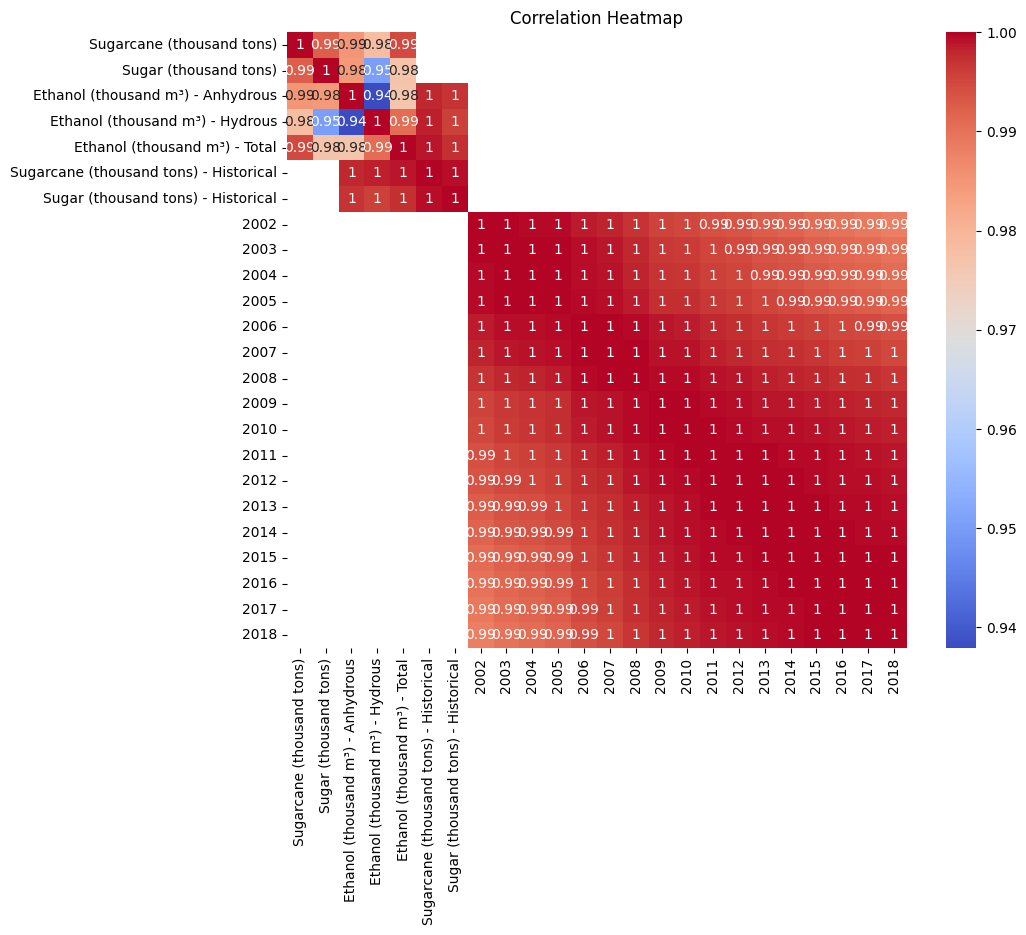

In [11]:
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_data = consolidated_new_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Assuming the relevant column for ethanol demand is 'Etanol (mil m³)_Total'
ethanol_data = consolidated_new_data[['Ethanol (thousand m³) - Total']].dropna()

#Outlier Detection

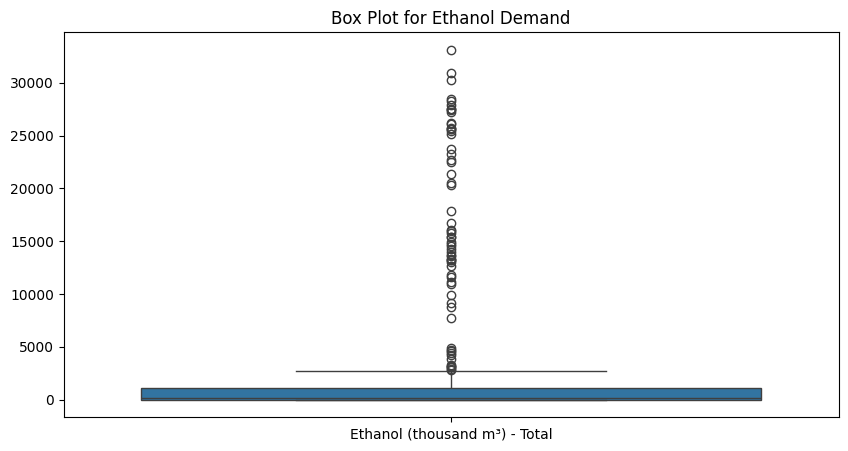

In [17]:
# Box plot for ethanol demand
plt.figure(figsize=(10, 5))
sns.boxplot(data=ethanol_data, orient='v')
plt.title('Box Plot for Ethanol Demand')
plt.show()


In [18]:
consolidated_new_data.describe()

,Sugarcane (thousand tons),Sugar (thousand tons),Ethanol (thousand m³) - Anhydrous,Ethanol (thousand m³) - Hydrous,Ethanol (thousand m³) - Total,Sugarcane (thousand tons) - Historical,Sugar (thousand tons) - Historical,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,464.000000,464.000000,493.000000,493.000000,493.000000,29.000000,29.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,57271.200220,3413.848364,976.120095,1457.124402,2433.244497,33170.697517,2334.544138,5.153530e+05,5.374118e+05,5.632721e+05,...,8.731694e+05,9.120731e+05,9.608966e+05,9.728858e+05,1.019410e+06,1.043698e+06,1.014560e+06,1.023330e+06,1.021123e+06,1.005297e+06
std,143509.237776,8560.114960,2442.559364,3840.225523,6189.359352,81402.246545,5775.131567,1.218277e+06,1.277374e+06,1.341077e+06,...,2.151845e+06,2.244940e+06,2.365549e+06,2.390745e+06,2.512830e+06,2.580871e+06,2.528423e+06,2.555442e+06,2.564293e+06,2.528183e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+01,9.300000e+01,9.300000e+01,...,7.000000e+01,1.300000e+02,1.300000e+02,1.300000e+02,1.330000e+02,1.410000e+02,1.350000e+02,1.320000e+02,8.600000e+01,1.600000e+02
25%,187.968500,0.000000,0.000000,5.009000,6.570000,102.999000,0.000000,7.105000e+03,7.293500e+03,7.265750e+03,...,9.923000e+03,1.054725e+04,1.259200e+04,1.336500e+04,1.380100e+04,1.335000e+04,1.330100e+04,1.335900e+04,1.259600e+04,1.170800e+04
50%,2519.532500,111.551500,79.841000,65.125000,137.072000,2681.857000,142.865000,4.836550e+04,5.352900e+04,5.623050e+04,...,7.387950e+04,7.335950e+04,6.797550e+04,7.237950e+04,7.099600e+04,7.109800e+04,6.808700e+04,5.946050e+04,5.184050e+04,5.305900e+04
75%,27408.324250,1666.010750,383.233000,670.385000,1103.857000,14891.497000,1093.233000,2.779170e+05,3.030430e+05,3.346605e+05,...,4.340050e+05,4.338862e+05,4.958210e+05,5.586640e+05,6.426860e+05,6.398990e+05,5.457622e+05,6.522628e+05,6.222028e+05,6.131495e+05
max,666824.240000,38734.075000,12187.000000,23193.857000,33113.820000,320650.076000,22567.260000,5.206656e+06,5.377216e+06,5.633700e+06,...,8.845833e+06,9.164756e+06,9.616615e+06,9.752328e+06,1.022304e+07,1.045428e+07,1.017983e+07,1.024270e+07,1.023326e+07,1.006374e+07


#Ethanol Demand Over Time

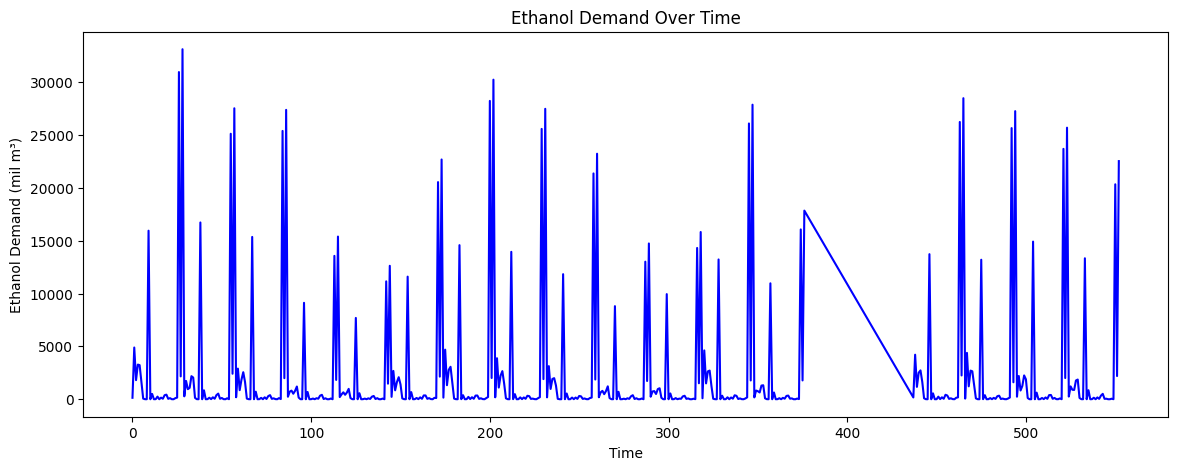

In [19]:
# Plot ethanol demand over time
plt.figure(figsize=(14, 5))
plt.plot(ethanol_data.index, ethanol_data['Ethanol (thousand m³) - Total'], color='blue')
plt.title('Ethanol Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Ethanol Demand (mil m³)')
plt.show()


In [20]:
# Generate a date range assuming monthly data starting from 2002
date_range = pd.date_range(start='2002-01-01', periods=len(ethanol_data), freq='M')
ethanol_data['date'] = date_range
ethanol_data.set_index('date', inplace=True)

In [21]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ethanol_data.values)


In [22]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [23]:
seq_length = 12  # Example sequence length (1 year)
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets

In [24]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Build the LSTM model

In [25]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 12, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 7s 101ms/step - loss: 0.0361 - val_loss: 0.0276
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0345 - val_loss: 0.0266
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0344 - val_loss: 0.0265
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0339 - val_loss: 0.0266
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0340 - val_loss: 0.0264
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0344 - val_loss: 0.0265
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0338 - val_loss: 0.0263
Epoch 8/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0334 - val_loss: 0.0263
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0337 - val_loss: 0.0262
Epoch 10/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0334 - val_loss: 0.0261
Epoch 11/

# Evaluate the model

In [28]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 [==============================] - 1s 4ms/step


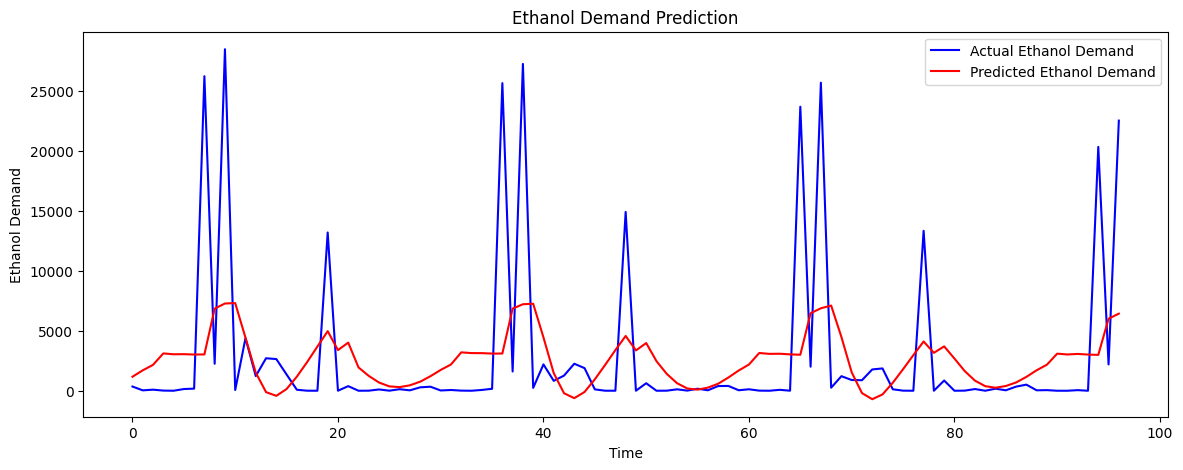

In [29]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Ethanol Demand')
plt.plot(predicted, color='red', label='Predicted Ethanol Demand')
plt.title('Ethanol Demand Prediction')
plt.xlabel('Time')
plt.ylabel('Ethanol Demand')
plt.legend()
plt.show()

The model predicts the monthly ethanol demand in Brazil based on the previous 12 months of data. The final output is a comparison of these predictions with the actual values, visualized in a plot to show how closely the predictions align with the real data.








#Residual Plot

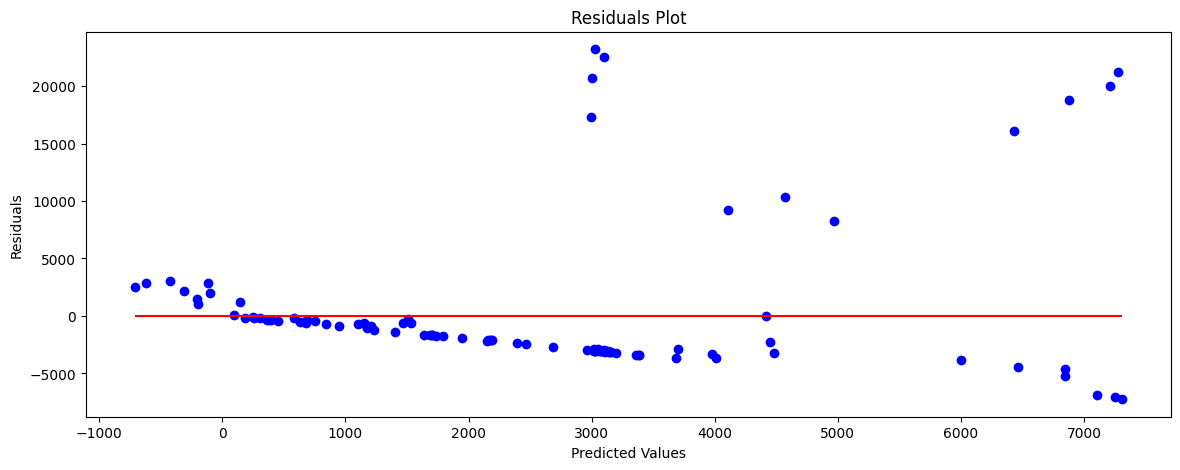

In [30]:
# Calculate residuals
residuals = y_test - predicted

# Residual plot
plt.figure(figsize=(14, 5))
plt.scatter(predicted, residuals, color='blue')
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max(), colors='red')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Predicted vs. Actual Scatter Plot

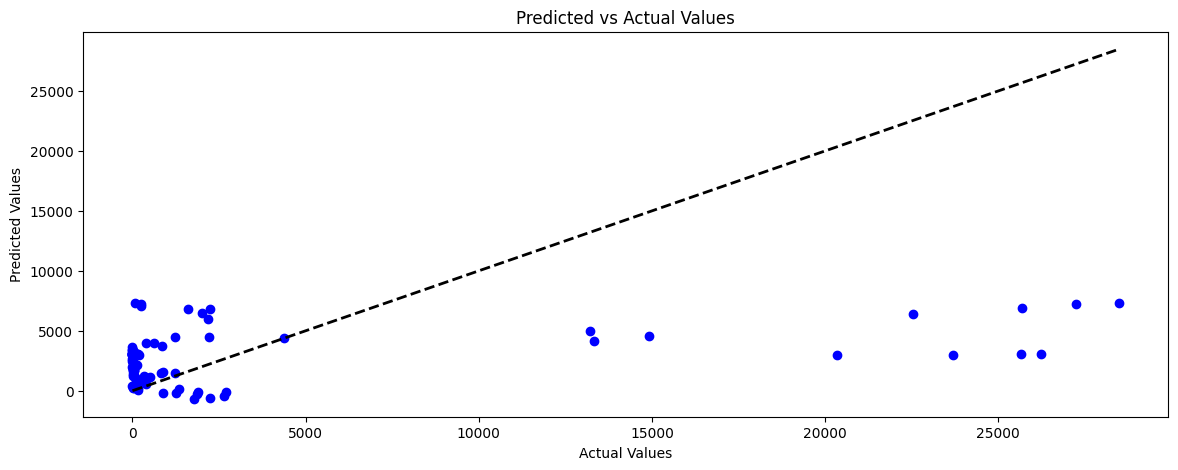

In [31]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(14, 5))
plt.scatter(y_test, predicted, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


*   The primary goal of this project is to predict future ethanol demand based on historical data.
*   The LSTM model is trained to understand the patterns in the data and make predictions accordingly.
*   The plots of training/validation loss and residuals help in evaluating the model's performance and understanding how well it generalizes to new data.





#Model Loss Over Epochs

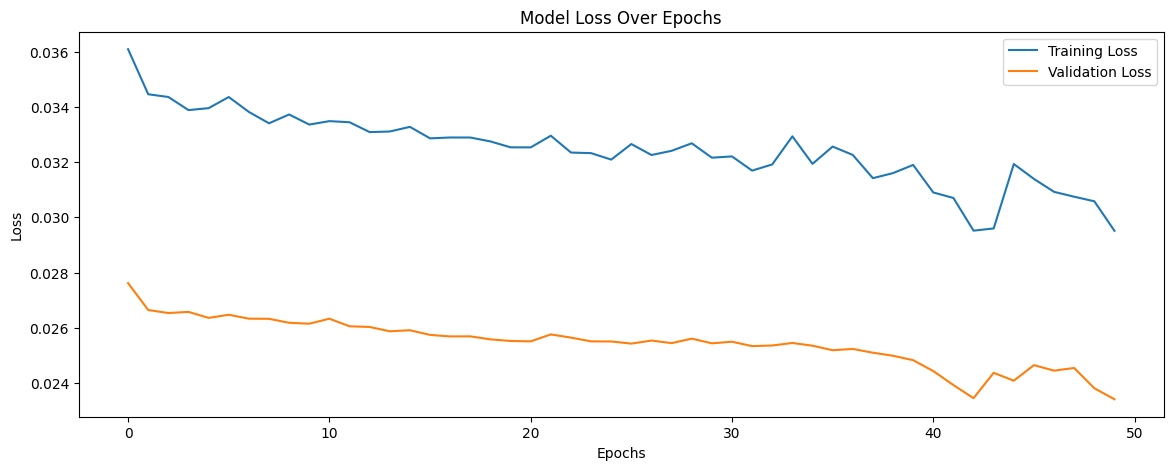

In [32]:
# Plot training and validation loss over epochs
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


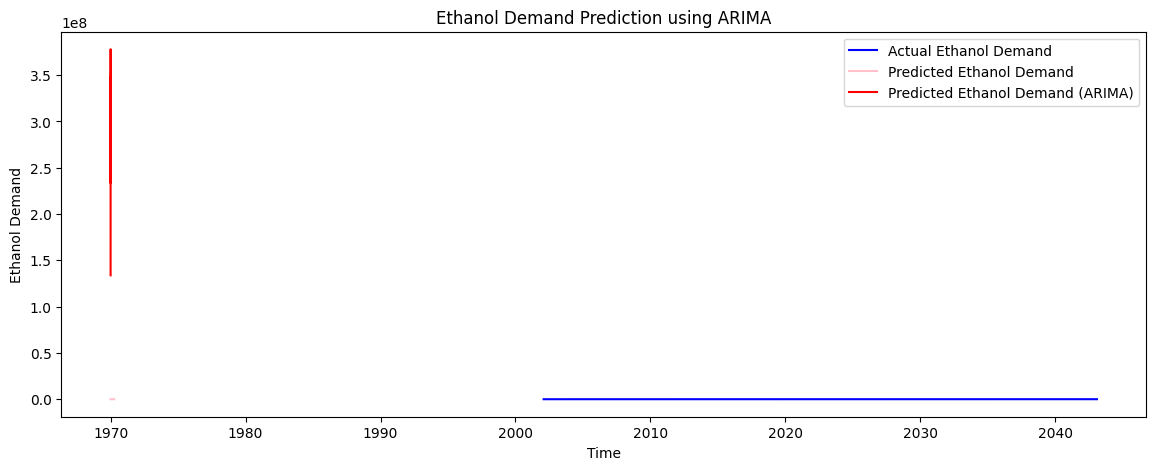

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np # Import numpy for array manipulation

# Fit an ARIMA model to the ethanol demand data
model = ARIMA(ethanol_data['Ethanol (thousand m³) - Total'], order=(5, 1, 0))
arima_results = model.fit()

# Make predictions using the ARIMA model
arima_predictions = arima_results.forecast(steps=10)

# Inverse transform the predictions to original scale
# Convert the Series to a NumPy array and then reshape
arima_predictions_unscaled = scaler.inverse_transform(np.array(arima_predictions).reshape(-1, 1))

# Plot the ARIMA predictions
plt.figure(figsize=(14, 5))
plt.plot(ethanol_data['Ethanol (thousand m³) - Total'], color='blue', label='Actual Ethanol Demand')
plt.plot(predicted, color='pink', label='Predicted Ethanol Demand')
plt.plot(arima_predictions_unscaled, color='red', label='Predicted Ethanol Demand (ARIMA)')
plt.title('Ethanol Demand Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Ethanol Demand')
plt.legend()
plt.show()